In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


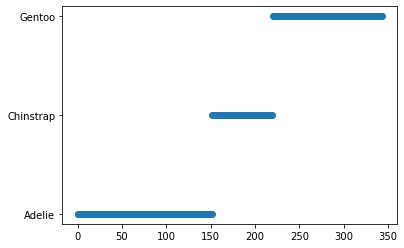

In [3]:
plt.scatter(df.index,df['species'])

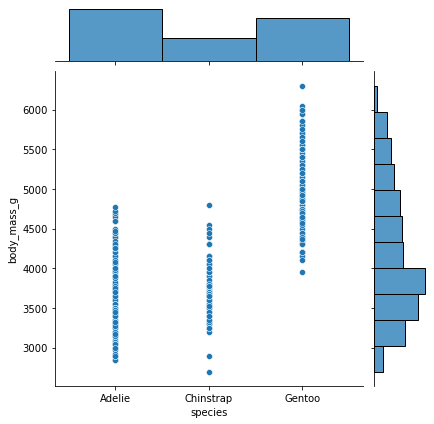

In [4]:
sns.jointplot(x='species',y='body_mass_g',data = df)

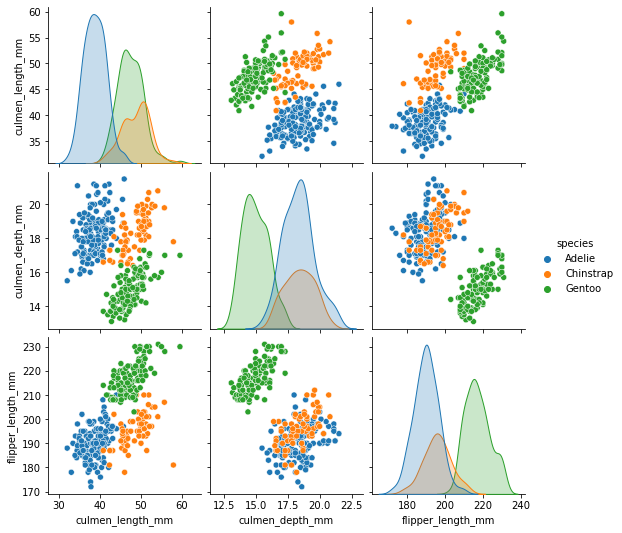

In [5]:
columns_to_compare = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']
sns.pairplot(df, vars=columns_to_compare, hue='species', diag_kind='kde')

In [6]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
df = df.dropna()
df = df.dropna(axis=1)

In [9]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['species', 'island','sex']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [11]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2


In [13]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
outliers_df = pd.DataFrame()
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers_df[col] = outliers
outliers_indices = outliers_df.any(axis=1)
print("Rows with outliers:")
print(df[outliers_indices])
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), upper_bound, df[col])

df.head()

Rows with outliers:
Empty DataFrame
Columns: [species, island, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2


In [16]:
target = df['species']
features = df.drop(columns=['species'])
print("Dependent (Target) Variable:")
print(target)

print("\nIndependent (Feature) Variables:")
features.head()

Dependent (Target) Variable:
0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: species, Length: 334, dtype: int32

Independent (Feature) Variables:


,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,2
1,2,39.5,17.4,186.0,3800.0,1
2,2,40.3,18.0,195.0,3250.0,1
4,2,36.7,19.3,193.0,3450.0,1
5,2,39.3,20.6,190.0,3650.0,2


In [18]:
correlation_matrix = pd.concat([features, target], axis=1).corr()
correlation_with_target = correlation_matrix['species'].drop('species')  

print("Correlation of Independent Variables with the Target:")
print(correlation_with_target)

Correlation of Independent Variables with the Target:
island              -6.235949e-01
culmen_length_mm     7.292618e-01
culmen_depth_mm     -7.408034e-01
flipper_length_mm    8.513508e-01
body_mass_g          7.510201e-01
sex                 -1.182401e-17
Name: species, dtype: float64


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
print("Min-Max Scaled Data:")
scaled_df.head()

Min-Max Scaled Data:


,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.5
2,1.0,0.298182,0.583333,0.389831,0.152778,0.5
3,1.0,0.167273,0.738095,0.355932,0.208333,0.5
4,1.0,0.261818,0.892857,0.305085,0.263889,1.0


In [21]:
from sklearn.model_selection import train_test_split
X = scaled_df 
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (267, 6)
X_test shape: (67, 6)
y_train shape: (267,)
y_test shape: (67,)
